In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')
train=pd.read_csv('../input/train_2016_v2.csv', parse_dates=['transactiondate'], date_parser=dateparse)

In [3]:
train.shape

(90275, 3)

In [4]:
train.isnull().sum()

parcelid           0
logerror           0
transactiondate    0
dtype: int64

In [5]:
train.head()

parcelid  logerror transactiondate
0  11016594    0.0276      2016-01-01
1  14366692   -0.1684      2016-01-01
2  12098116   -0.0040      2016-01-01
3  12643413    0.0218      2016-01-02
4  14432541   -0.0050      2016-01-02

-4.605 4.737 0.006 0.0114572196068 1254 1.6487212707


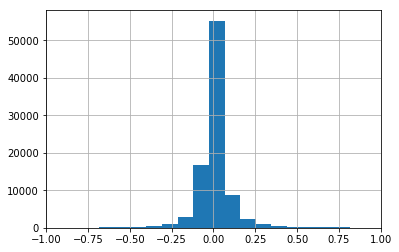

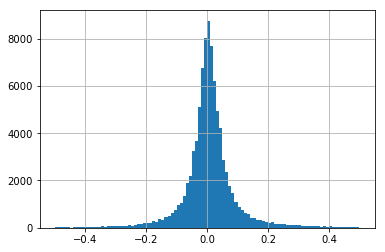

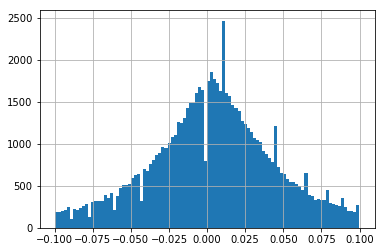

In [6]:
a=train.logerror
print a.min(),a.max(),a.median(),a.mean(), (np.abs(a)>0.5).sum(),np.exp(0.5)
a.hist(bins=100);xlim(-1,1);plt.show()
a[np.abs(a)<0.5].hist(bins=100);plt.show()
a[np.abs(a)<0.1].hist(bins=100);plt.show()

In [7]:
train.dtypes

parcelid                    int64
logerror                  float64
transactiondate    datetime64[ns]
dtype: object

In [8]:
from datetime import date
from pandas.tseries import offsets
def year_begin(d):
    return d-offsets.YearBegin()
def daysInYear1(d):
    year=d.year
    b=datetime.datetime.fromordinal(date(year,1,1).toordinal())
    return (d-b).days
def daysInYear2(d):
    year=d.year
    b=datetime.datetime.fromordinal(date(year,7,1).toordinal())
    return (d-b).days

In [9]:
train.iloc[0].transactiondate.year

2016

In [10]:
train['year']=train['transactiondate'].apply(lambda u: u.year)
train['month']=train['transactiondate'].apply(lambda u: u.month)

In [11]:
#train['daysInYear1']=train['transactiondate'].apply(lambda u: daysInYear1(u))

In [12]:
#train['daysInYear2']=train['transactiondate'].apply(lambda u: daysInYear2(u))

In [13]:
train.dtypes

parcelid                    int64
logerror                  float64
transactiondate    datetime64[ns]
year                        int64
month                       int64
dtype: object

In [14]:
train_data=train[['parcelid','logerror','year','month']]

In [15]:
properties=pd.read_csv('../input/train1_cleaned.csv') 
properties.shape

(2985217, 94)

In [16]:
properties.values.nbytes/1024.**3

2.090710386633873

In [17]:
if 0:
    for col in ['basementsqft',
     'calculatedfinishedsquarefeet',
     'finishedfloor1squarefeet',
     'finishedsquarefeet12',
     'finishedsquarefeet13',
     'finishedsquarefeet15',
     'finishedsquarefeet50',
     'finishedsquarefeet6',
     'garagetotalsqft',
     'lotsizesquarefeet',
     'yardbuildingsqft17',
     'yardbuildingsqft26','poolsizesum']:
        properties[col+"_log"]=np.round(np.log10(properties[col]),0)
        properties[col+"_sqrt"]=np.round(np.sqrt(properties[col]),0)

In [18]:
 [ u for u in properties.columns if "zip" in u]

['regionidzip']

In [19]:
properties.dtypes

parcelid                            int64
airconditioningtypeid             float64
architecturalstyletypeid          float64
basementsqft                      float64
bathroomcnt                       float64
bedroomcnt                        float64
buildingqualitytypeid             float64
calculatedbathnbr                 float64
calculatedfinishedsquarefeet      float64
censustractandblock               float64
decktypeid                        float64
finishedfloor1squarefeet          float64
finishedsquarefeet12              float64
finishedsquarefeet13              float64
finishedsquarefeet15              float64
finishedsquarefeet50              float64
finishedsquarefeet6               float64
fips                              float64
fireplacecnt                      float64
fireplaceflag                     float64
fullbathcnt                       float64
garagecarcnt                      float64
garagetotalsqft                   float64
hashottuborspa                    

In [20]:
train_cat=pd.merge(train_data,properties,how='left',on='parcelid')
train_cat.shape

(90275, 97)

In [21]:
train_cat.head()

parcelid  logerror  year  month  airconditioningtypeid  \
0  11016594    0.0276  2016      1                    1.0   
1  14366692   -0.1684  2016      1                    NaN   
2  12098116   -0.0040  2016      1                    1.0   
3  12643413    0.0218  2016      1                    1.0   
4  14432541   -0.0050  2016      1                    NaN   

   architecturalstyletypeid  basementsqft  bathroomcnt  bedroomcnt  \
0                       NaN           NaN          2.0         3.0   
1                       NaN           NaN          3.5         4.0   
2                       NaN           NaN          3.0         2.0   
3                       NaN           NaN          2.0         2.0   
4                       NaN           NaN          2.5         4.0   

   buildingqualitytypeid          ...           propertyzoningdesc_L  \
0                    4.0          ...                            1.0   
1                    NaN          ...                            NaN   
2                    4.0          ...                            NaN   
3                    4.0          ...                            1.0   
4                    NaN          ...                            NaN   

   propertyzoningdesc_M  propertyzoningdesc_N  propertyzoningdesc_P  \
0                   NaN                   NaN                   NaN   
1                   NaN                   NaN                   NaN   
2                   NaN                   NaN                   1.0   
3                   NaN                   NaN                   NaN   
4                   NaN                   NaN                   NaN   

   propertyzoningdesc_R  propertyzoningdesc_S  propertyzoningdesc_T  \
0                   NaN                   NaN                   NaN   
1                   NaN                   NaN                   NaN   
2                   NaN                   NaN                   NaN   
3                   NaN                   NaN                   NaN   
4                   NaN                   NaN                   NaN   

   propertyzoningdesc_W  propertyzoningdesc_X  propertyzoningdesc_n  
0                   NaN                   NaN                   NaN  
1                   NaN                   NaN                   1.0  
2                   NaN                   NaN                   NaN  
3                   NaN                   NaN                   NaN  
4                   NaN                   NaN                   1.0  

[5 rows x 97 columns]

In [22]:
train_cat.to_csv("../input/train2016_withy.csv",index=None)

In [23]:
properties['logerror']=np.nan
properties['year']=np.nan
properties['month']=np.nan

In [24]:
properties=properties[train_cat.columns]

In [25]:
properties.head()

parcelid  logerror  year  month  airconditioningtypeid  \
0  10754147       NaN   NaN    NaN                    NaN   
1  10759547       NaN   NaN    NaN                    NaN   
2  10843547       NaN   NaN    NaN                    NaN   
3  10859147       NaN   NaN    NaN                    NaN   
4  10879947       NaN   NaN    NaN                    NaN   

   architecturalstyletypeid  basementsqft  bathroomcnt  bedroomcnt  \
0                       NaN           NaN          0.0         0.0   
1                       NaN           NaN          0.0         0.0   
2                       NaN           NaN          0.0         0.0   
3                       NaN           NaN          0.0         0.0   
4                       NaN           NaN          0.0         0.0   

   buildingqualitytypeid          ...           propertyzoningdesc_L  \
0                    NaN          ...                            NaN   
1                    NaN          ...                            1.0   
2                    NaN          ...                            1.0   
3                    7.0          ...                            1.0   
4                    NaN          ...                            1.0   

   propertyzoningdesc_M  propertyzoningdesc_N  propertyzoningdesc_P  \
0                   NaN                   NaN                   NaN   
1                   NaN                   NaN                   NaN   
2                   NaN                   NaN                   NaN   
3                   NaN                   NaN                   NaN   
4                   NaN                   NaN                   NaN   

   propertyzoningdesc_R  propertyzoningdesc_S  propertyzoningdesc_T  \
0                   NaN                   NaN                   NaN   
1                   NaN                   NaN                   NaN   
2                   NaN                   NaN                   NaN   
3                   NaN                   NaN                   NaN   
4                   NaN                   NaN                   NaN   

   propertyzoningdesc_W  propertyzoningdesc_X  propertyzoningdesc_n  
0                   NaN                   NaN                   1.0  
1                   NaN                   NaN                   NaN  
2                   NaN                   NaN                   NaN  
3                   NaN                   NaN                   NaN  
4                   NaN                   NaN                   NaN  

[5 rows x 97 columns]

In [26]:
properties.to_csv("../input/test2016_withy.csv",index=None)